<h1 align="center"><font size="5">Self Project: Weather Prediction In Australia</font></h1>

![](https://media.npr.org/assets/img/2020/02/07/australia-flood_wide-f5673c9f989ef2f6796960e46c02be4f96ecfb35-s800-c85.webp)

<a class="anchor" id="0.1"></a>
# Table of Contents


1. [Instructions](#1)
2. [About The Dataset](#2)
3. [Importing the required libraries](#3)
4. [Importing the Dataset](#4)
5. [Exploratory data analysis](#5)
6. [Declare feature vector and target variable ](#6)
7. [Split data into separate training and test set](#7)
8. [Feature Engineering](#8)
9. [Data processing](#9)
10. [Model Building And Evaluation](#10)
11. [Report](#11)

# 1. Instructions <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

In this project , I have collected the **Australian Weather forecast data from kaggle**. 
Then I did Some EDA to find important insigths from data
In this project I will try to find best model among listed below for prediction of the rain along with i will perform model evaluation to test its predictability

I  will use some of the algorithms as below:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression

I will evaluate  models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, I will use this models to generate the report displaying the accuracy scores.


![Rains](http://bestanimations.com/Nature/Water/rain/rain-nature-animated-gif-17.gif)

# 2.  About The Dataset <a class="anchor" id="2"></a>


we have a large database that contains 145460 values and 23 columns, here I will use the database "weatherAUS.csv" that was taken from the kaggle.

 https://www.kaggle.com

This dataset contains observations of weather metrics for each day from 2007 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



# 3.  Importing the required libraries <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import seaborn as sns


# 4.   Importing the Dataset  <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

In [3]:
df = pd.read_csv('WeatherAus.csv')

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 5.  Exploratory Data Analysis  <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

**From above it is clear that data contains both numerical and categorical data**

In [5]:
# let us print the columns name of the data
col_names=df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# let us get some statistical distrubution of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Drop row for which target label is not provided**

In [9]:
df=df[(df["RainTomorrow"]=="Yes")|(df["RainTomorrow"]=="No")]

### Numeric and Categorical columns 
<br> **let us find columns containing numeric and categorical data**

In [10]:
numerical=df.select_dtypes(include="float64").columns
numerical

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [11]:
print('no of numerical variable \n:',len(numerical))

no of numerical variable 
: 16


In [12]:
print("numerical variables are :",numerical)

numerical variables are : Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [13]:
categorical=df.select_dtypes(include="object").columns

In [14]:
print('no of numerical variable \n:',len(categorical))

no of numerical variable 
: 7


In [15]:
print("categorical variables are :",categorical)

categorical variables are : Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')



**Summary of categorical variables**

   There is a date variable.It is denoted by Date column.
   <br>There are 6 categorical variables. 
   <br>These are given by **Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow**.
   <br>There are two binary categorical variables - **RainToday and RainTomorrow**.
   <br>**RainTomorrow is the target variable**.


**Checking for cardinality of categorical columns**

In [16]:
for col in categorical:
    print(f"{col}: {df[col].nunique()}")

Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


### Feature Engineering Of Date Variable

**Only Date column have very high cardinality(no of unique value) and we will convert it to datetime**

In [17]:
df["Date"]=pd.to_datetime(df["Date"])

In [18]:
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

df.drop("Date",axis=1,inplace=True)

In [19]:
# data set collected between year 2007 and 2008
df['year'].describe()

count    142193.000000
mean       2012.758926
std           2.541256
min        2007.000000
25%        2011.000000
50%        2013.000000
75%        2015.000000
max        2017.000000
Name: year, dtype: float64

In [20]:
# let us convert yes with 1 and no with 0 for simplicity
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0,2008,12,5


In [21]:
df[['RainToday','RainTomorrow']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   RainToday     140787 non-null  float64
 1   RainTomorrow  142193 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


#### Updating categorical and numrical variables after replacing Date with coressponting Day,Month and Year

In [22]:
# let us update the categorical data 
categorical=df.select_dtypes(include="object").columns
df[categorical].dtypes

Location       object
WindGustDir    object
WindDir9am     object
WindDir3pm     object
dtype: object

In [23]:
# let us update the numerical data
numerical=df.select_dtypes(include="float64").columns
df[numerical].dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
dtype: object

Above we can see that we have converted RainToday and RainTomorrow data types from **object** to **float64**

#### Visualization

In [24]:
# Here we will find unique values in RainTomorrow 
df['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [25]:
#Frequency Distrubution of values
rtomorrow=df['RainTomorrow'].value_counts()
rtomorrow

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

In [26]:
# Here i have created a function to plot pie chart which takes input as data and title for plot
def pie_plot(data,title):
    plt.pie(data,labels=data.index, 
        autopct='%1.4f%%',
        startangle=90,
        shadow=True)
    plt.title(title)
    plt.show()

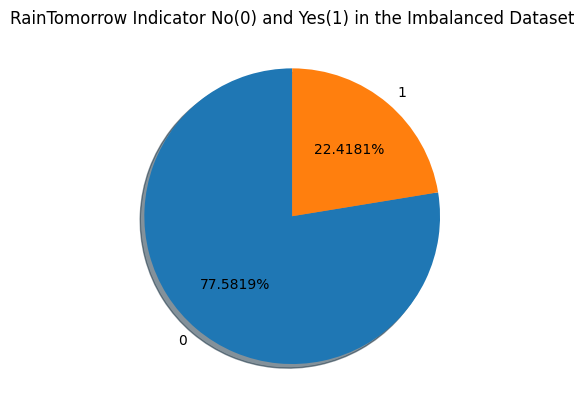

In [27]:
pie_plot(data=rtomorrow,title="RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset")

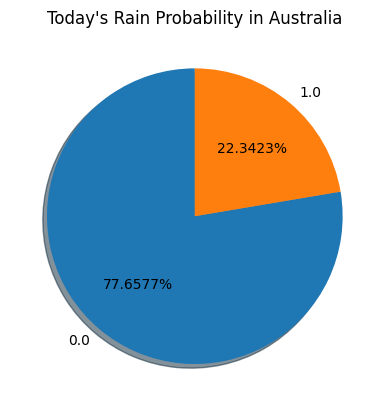

In [28]:
# let us plot pie chart for RainToday
rtoday=df['RainToday'].value_counts()
pie_plot(data=rtoday,title="Today's Rain Probability in Australia")

### Outliers in numerical variables

In [29]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

From above data it is concluded that outliars contain in **Rainfall,  Evaporation, WindSpeed9am , WindSpeed3pm**
1. **Rainfall** mean is 2 and max is 371
2. **Evaporation** mean is 5 and max is 145
3. **WindSpeed9am** mean is 14 and max is 130
4. **WindSpeed3pm** mean is 19 and max is 87

In [30]:
Rainfall=df['Rainfall']
Evaporation=df['Evaporation']
WindSpeed9am=df['WindSpeed9am']
WindSpeed3pm=df['WindSpeed3pm']

In [31]:
#created function for histogram plot to avoid repeatation some basic steps
# we just need to give input column name as a data and title to get plot
def histogram (data,title):
    plt.figure(figsize=(15,10))
    plt.subplot(2, 2,1)
    fig = data.hist(bins=10)
    fig.set_xlabel(title)
    fig.set_ylabel('RainTomorrow')
    fig.set_title(title +' vs RainTomorrow' )

In [32]:
#created function for boxplot to avoid repeatation some basic steps
# we just need to give input column name as a data an title to get plot
def boxplot (data,title):
     plt.figure(figsize=(15,10))
     plt.subplot(2, 2, 1)
     fig = df.boxplot(column=title)
     fig.set_title(title +' vs RainTomorrow')
     fig.set_ylabel(title)


### Boxplot for to determine presence of outliers

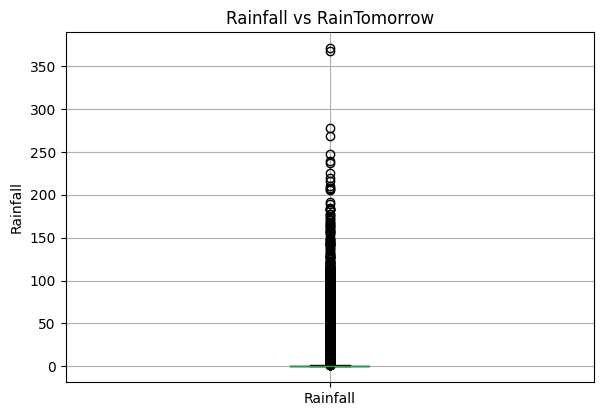

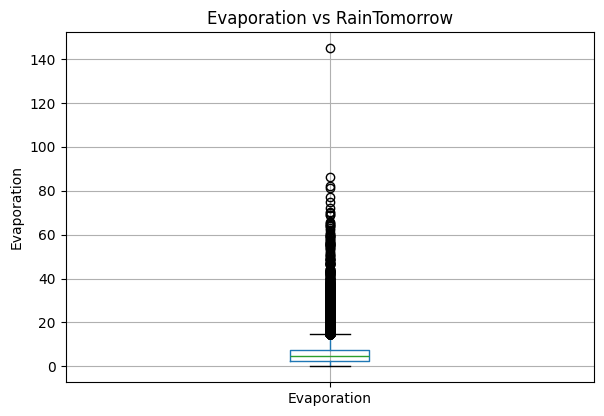

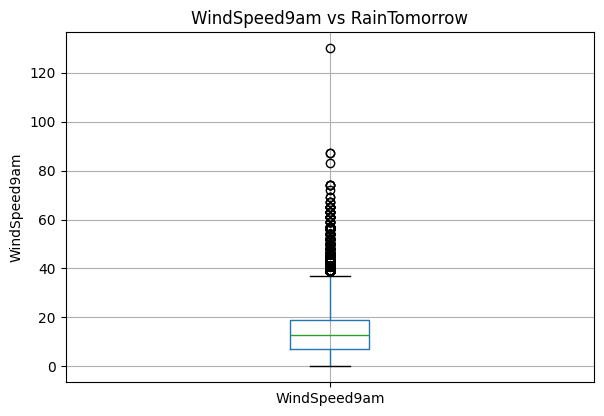

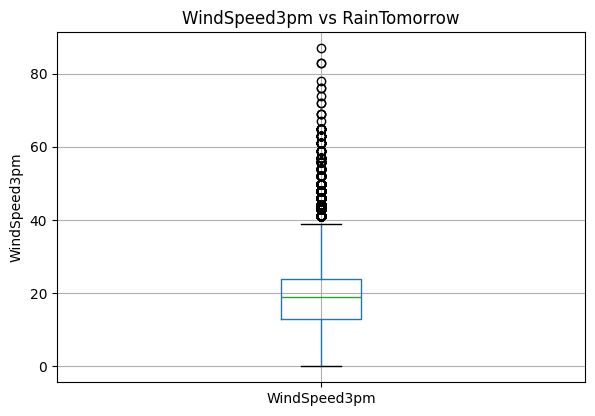

In [33]:
boxplot(data=Rainfall,title='Rainfall')
boxplot(data=Evaporation,title='Evaporation')
boxplot(data=WindSpeed9am,title='WindSpeed9am')
boxplot(data=Rainfall,title='WindSpeed3pm')

### Check the distribution of variables using Histogam


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find IQR (Interquantile range).

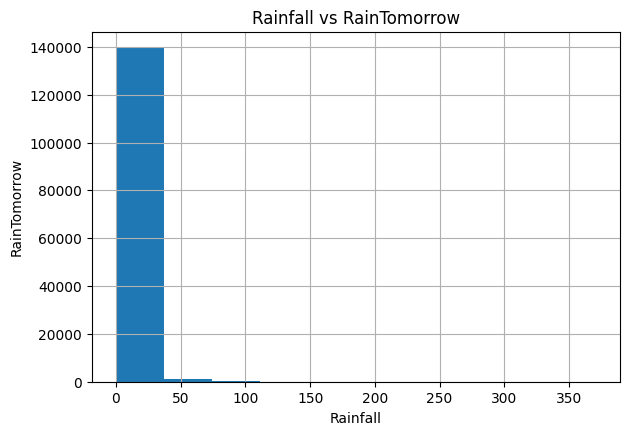

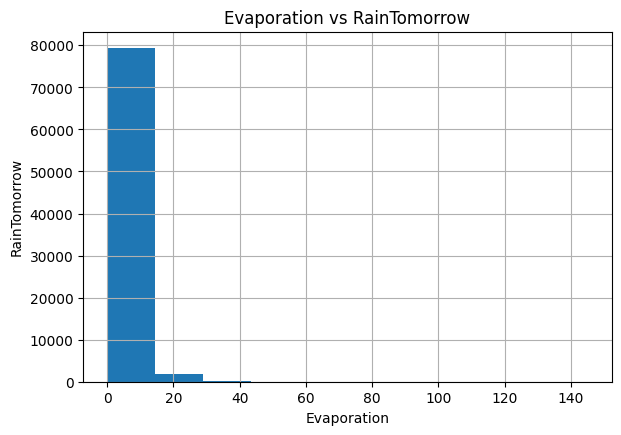

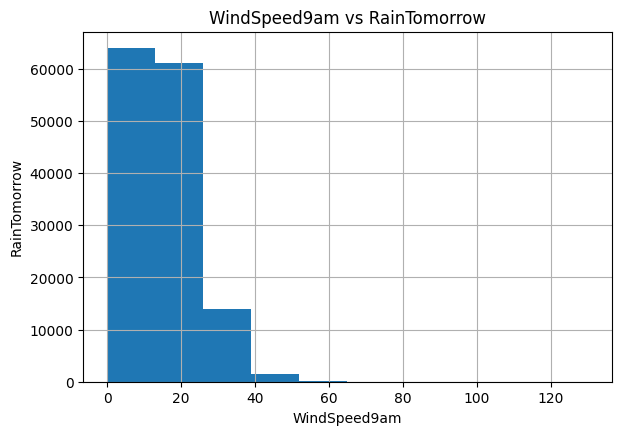

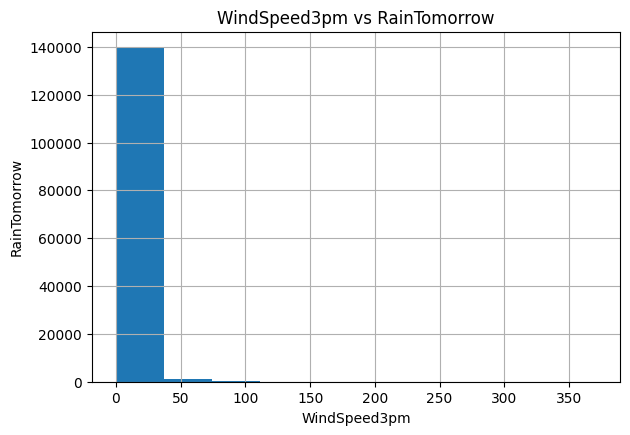

In [34]:
histogram(data=Rainfall,title='Rainfall')
histogram(data=Evaporation,title='Evaporation')
histogram(data=WindSpeed9am,title='WindSpeed9am')
histogram(data=Rainfall,title='WindSpeed3pm')

We can see that all the four variables are **skewed**. So, I will use interquantile range to find outliers.

### Find Outliers for Rainfall Variable

In [35]:
# Here I have creatd function to find IQR
def iqr(data,title):
    IQR = round(data.quantile(0.75) - data.quantile(0.25))
    lower = round(data.quantile(0.25) - (IQR * 1.5),2)
    upper = round(data.quantile(0.75) + (IQR * 1.5),2)
    min_value=data.min()
    max_value=data.max()
    print(f" {title} upper limit: {upper} |lower limit: {lower} , min value:{min_value} , max value:{max_value}")

In [36]:

iqr(data=Rainfall,title='Rainfall')
iqr(data=Evaporation,title='Evaporation')
iqr(data=WindSpeed9am,title='WindSpeed9am')
iqr(data=WindSpeed3pm,title='WindSpeed3pm')

 Rainfall upper limit: 2.3 |lower limit: -1.5 , min value:0.0 , max value:371.0
 Evaporation upper limit: 14.9 |lower limit: -4.9 , min value:0.0 , max value:145.0
 WindSpeed9am upper limit: 37.0 |lower limit: -11.0 , min value:0.0 , max value:130.0
 WindSpeed3pm upper limit: 40.5 |lower limit: -3.5 , min value:0.0 , max value:87.0


**From above it is clear the presence and range of outliars**

# 6. Declare feature vector and target variable <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

In [37]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

# 7. Split data into separate training and test set <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


In [38]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [39]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 24), (28439, 24))

# **8. Feature Engineering** <a class="anchor" id="8"></a>
[Table of Contents](#0.1)

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [40]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
year               int32
month              int32
day                int32
dtype: object

In [41]:
# display categorical variables
categorical

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [42]:
# display numerical variable
numerical

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

As we have drop RainTomorrow from dataset let us define numerical variable for train data 

In [43]:
num_1=X_train.select_dtypes(include="float64").columns
num_1

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

## Engineering missing values in numerical variables


### Assumption


I assume that the data are missing completely at random . There are two methods which can be used to impute missing values in **numerical variable**. One is **mean or median imputation** and other one is random sample imputation. When there are **outliers** in the dataset, we should use **median imputation**. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [44]:
X_train[num_1].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
RainToday         1139
dtype: int64

In [45]:
X_test[num_1].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
RainToday          267
dtype: int64

In [46]:
# impute missing values in X_train and X_test with respective column median in X_train
for col in num_1:
    X_train[col].fillna(X_train[col].median(),inplace=True)
    X_test[col].fillna(X_train[col].median(),inplace=True)

**Now let us verify if there any missing values present in train and test data**

In [47]:
X_train[num_1].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [48]:
X_test[num_1].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

**So from above it is clear that there are no missing values in numerical variable**

## Engineering missing values in categorical variables

In [49]:
X_train[categorical].isnull().sum()

Location          0
WindGustDir    7407
WindDir9am     7978
WindDir3pm     3008
dtype: int64

In [50]:
X_test[categorical].isnull().sum()

Location          0
WindGustDir    1923
WindDir9am     2035
WindDir3pm      770
dtype: int64

In [51]:
# impute missing values in X_train and X_test with respective column mode in X_train
for col in categorical:
    X_train[col].fillna(X_train[col].mode()[0],inplace=True)
    X_test[col].fillna(X_train[col].mode()[0],inplace=True)

**Now let us verify if there any missing values present in train and test data**

In [52]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [53]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [54]:
X_train=pd.get_dummies(X_train,drop_first=True,columns=categorical)
X_test=pd.get_dummies(X_test,drop_first=True,columns=categorical)

**So from above it is clear that there are no missing values in categorical variable**

## Outliars In The Trained Data 

In [55]:
# let us find outliars in trained data
for col in ["Rainfall","Evaporation","WindSpeed9am","WindSpeed3pm"]:
    q1=np.quantile(X_train[col],0.25)
    q3=np.quantile(X_train[col],0.75)
    iqr=q3-q1
    
    lower_limit=round(q1-1.5*iqr,2)
    upper_limit=round(q3+1.5*iqr,2)
    
    print(f"{col}: |upper: {upper_limit} |lower: {lower_limit}")

Rainfall: |upper: 1.5 |lower: -0.9
Evaporation: |upper: 7.5 |lower: 1.9
WindSpeed9am: |upper: 37.0 |lower: -11.0
WindSpeed3pm: |upper: 40.5 |lower: -3.5


### Treatment  of the outliars

In [56]:
X_train=X_train[(X_train[col]<upper_limit)&(X_train[col]>lower_limit)]
X_test=X_test[(X_test[col]<upper_limit)&(X_test[col]>lower_limit)]

**By removing outliers we have removed rows from features dataset(X_train and X_test) and not from target dataset therefore they will be of different dimension and we will use inner join to have same no of rows**

**Making the features and target datasets of same size**

In [57]:
train=pd.concat([X_train,y_train],axis=1,join="inner")
test=pd.concat([X_test,y_test],axis=1,join="inner")

In [58]:
col=['MinTemp', 'MaxTemp', 'WindSpeed9am','WindSpeed3pm', 
     'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm',
     'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm','RainTomorrow']

In [59]:
corr=train[col].corr()

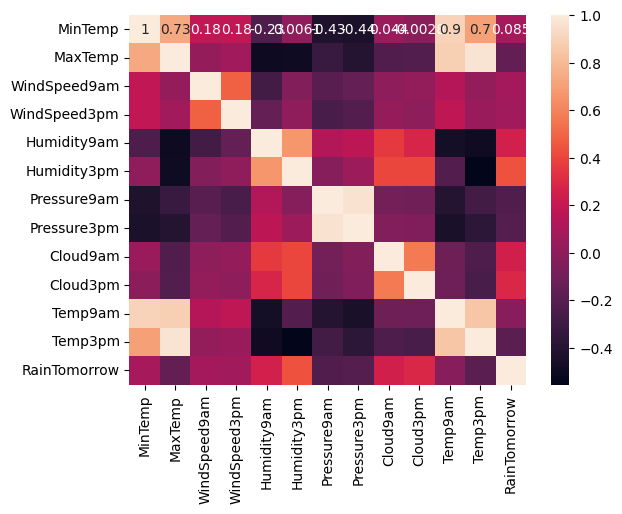

In [60]:
sns.heatmap(train[col].corr(),annot=True);


# 9. Data processing <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [61]:
drop_col=["MinTemp", "MaxTemp","Temp9am", "Temp3pm","RainTomorrow"]
X_train=train.drop(drop_col,axis=1)
y_train=train["RainTomorrow"]

X_test=test.drop(drop_col,axis=1)
y_test=test["RainTomorrow"]

In [62]:
from sklearn.preprocessing import StandardScaler

scaled=StandardScaler()
scaled.fit(X_train)

train=scaled.transform(X_train)
test=scaled.transform(X_test)

X_train=pd.DataFrame(X_train,columns=X_train.columns)
X_test=pd.DataFrame(X_test,columns=X_test.columns)

In [63]:
y_train.isnull().sum()

0

# 10. Model Building And Evaluation  <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

### 1. Linear Regression

In [64]:
LinearReg = LinearRegression().fit(X_train, y_train)

In [65]:
predictions = LinearReg.predict(X_test)

In [66]:
from sklearn.metrics import r2_score

In [67]:
LinearRegression_MAE = np.mean(np.absolute(predictions-y_test))
LinearRegression_MSE = np.mean((predictions-y_test)**2)
LinearRegression_R2 =  r2_score(y_test,predictions)

In [68]:
report= pd.DataFrame({"error":["Mean Absolute Error","Mean Squared Error","R2-Score"],"Linear Regression":[LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]})
report

,error,Linear Regression
0,Mean Absolute Error,0.253135
1,Mean Squared Error,0.113030
2,R2-Score,0.340724


### 2.  Logistic Regression

In [69]:
LR = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,y_train)

In [70]:
predictions = LR.predict(X_test)

In [71]:
LR_Accuracy_Score = accuracy_score(y_test,predictions)
LR_JaccardIndex = jaccard_score(y_test,predictions)
LR_F1_Score = f1_score(y_test,predictions)
LR_Log_Loss = log_loss(y_test,predictions)

###  3.  KNN

In [72]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

In [73]:
predictions = KNN.predict(X_test)

In [74]:
KNN_Accuracy_Score = accuracy_score(y_test,predictions)
KNN_JaccardIndex = jaccard_score(y_test,predictions)
KNN_F1_Score = f1_score(y_test,predictions)

### 4.  Decision Tree

In [75]:
Tree = DecisionTreeClassifier().fit(X_train,y_train)

In [76]:
predictions = Tree.predict(X_test)

In [77]:
Tree_Accuracy_Score = accuracy_score(y_test,predictions)
Tree_JaccardIndex = jaccard_score(y_test,predictions)
Tree_F1_Score = f1_score(y_test,predictions)

In [81]:
Report = pd.DataFrame({'error':['Accurancy','Jaccard Index','F1-Score','LogLoss'],
                       'KNN':[KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,'Na'],
                      'Decision Tree':[Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score,'Na'],
                      'Logistic Regression':[LR_Accuracy_Score,LR_JaccardIndex,LR_F1_Score,LR_Log_Loss],
                      })


# 11.Report <a class="anchor" id="11"></a>
[Table of Contents](#0.1)

In [82]:
Report

,error,KNN,Decision Tree,Logistic Regression
0,Accurancy,0.835322,0.793212,0.849980
1,Jaccard Index,0.345628,0.363626,0.423733
2,F1-Score,0.513705,0.533323,0.595243
3,LogLoss,Na,Na,5.407258


**We can clearly seen from above that the *Logistic Regression* is the best or more accurate model for predicting Rain Probability**